In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path = '/Users/aymericvie/Documents/GitHub/evology/evology/data/replication/empirical_funds/flow_data.csv'
df = pd.read_csv(path)


In [31]:
print(df.columns)

Index(['Unnamed: 0', 'cik', 'series_id', 'form', 'report_date', 'as_of_date',
       'total_assets', 'total_liabilities', 'net_assets',
       'month_1_flow_redemption', 'month_1_flow_reinvestment',
       'month_1_flow_sales', 'month_2_flow_redemption',
       'month_2_flow_reinvestment', 'month_2_flow_sales',
       'month_3_flow_redemption', 'month_3_flow_reinvestment',
       'month_3_flow_sales'],
      dtype='object')


0         6313623.67
1         5909266.25
2         6394381.93
3         3827827.37
4         4148325.14
             ...    
106688    9661252.58
106689    5667280.52
106690    2519334.99
106691    3714530.98
106692    5667280.52
Name: month_1_flow_redemption, Length: 106693, dtype: float64
34220122.92760041


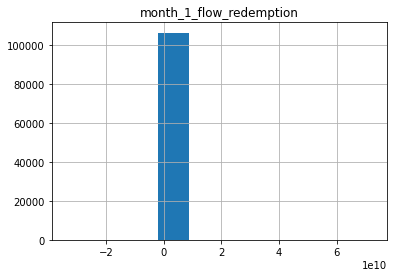

In [32]:
print(df['month_1_flow_redemption'])
df.hist('month_1_flow_redemption')
print(df['month_1_flow_redemption'].mean())

In [33]:
sum_net_assets = df['net_assets'].sum()
sum_changes_month1 = df['month_1_flow_redemption'].sum() + df['month_1_flow_sales'].sum() + df['month_1_flow_reinvestment'].sum()

variation_month_1 = 100 * abs(sum_changes_month1 / sum_net_assets)
print(variation_month_1)

sum_changes_month2 = df['month_2_flow_redemption'].sum() + df['month_2_flow_sales'].sum() + df['month_2_flow_reinvestment'].sum()

variation_month_2 = 100 * abs(sum_changes_month2 / sum_net_assets)
print(variation_month_2)

sum_changes_month3 = df['month_3_flow_redemption'].sum() + df['month_3_flow_sales'].sum() + df['month_3_flow_reinvestment'].sum()

variation_month_3 = 100 * abs(sum_changes_month3 / sum_net_assets)
print(variation_month_3)

print('Average ' + str(variation_month_1 / 3 + variation_month_2 / 3 + variation_month_3 / 3))

sum_redemptions = abs(df['month_3_flow_redemption']).sum() + abs(df['month_2_flow_redemption']).sum() + abs(df['month_1_flow_redemption']).sum()
percentage_redemptions = 100 * sum_redemptions / sum_net_assets
print(percentage_redemptions)

4.466510031767579
4.4869492062410625
5.072889576359245
Average 4.6754496047892955
8.276962830849376


inf
8.555388946193244


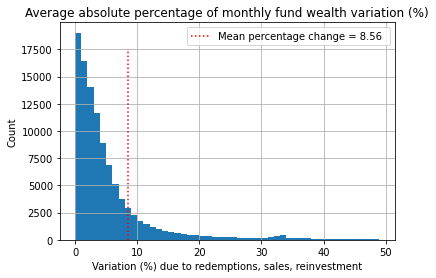

In [34]:
''' Distribution '''
import numpy as np

df['Flow1'] = abs((df['month_1_flow_redemption'] + df['month_1_flow_sales'] + df['month_1_flow_reinvestment']) / df['net_assets'])
df['Flow2'] = abs((df['month_2_flow_redemption'] + df['month_2_flow_sales'] + df['month_2_flow_reinvestment']) / df['net_assets'])
df['Flow3'] = abs((df['month_3_flow_redemption'] + df['month_3_flow_sales'] + df['month_3_flow_reinvestment']) / df['net_assets'])

df['FlowAvg'] = 100 * (df['Flow1'] / 3 + df['Flow2'] / 3 + df['Flow3'] / 3)
# df.replace([np.inf, -np.inf], np.nan,inplace=True)
print(df['FlowAvg'].mean())
# df['FlowAvg'] = df['FlowAvg'].apply(lambda x: [y if y <= 100 else 100 for y in x])
df['FlowAvg'].values[df['FlowAvg'] > 1000] = 1000
print(df['FlowAvg'].mean())

df.hist(column='FlowAvg', bins = range(0,50))
plt.title('Average absolute percentage of monthly fund wealth variation (%)')
plt.xlabel('Variation (%) due to redemptions, sales, reinvestment')
plt.ylabel('Count')
num = round(df['FlowAvg'].mean(),2)
plt.vlines(num, colors='r', ymin = 0, ymax = 17500, linestyles='dotted', label= 'Mean percentage change = %.2f ' % num)
plt.legend()
plt.show()


In [37]:
# WEALTH FLOWS (percent variation in NAV averaged across entities)



# what we can't do: pct_change over nav column.
# Because it would consider variations between funds that are not the same.
# Because also we have negative and 0.0 values. 
wrong_pct = df['net_assets'].pct_change().mean()
print(wrong_pct)

# Example for the first fund series_id:
df2 = df[df['series_id'] == 'S000000008']
tiny_pct = df2['net_assets'].pct_change().mean()
print(tiny_pct)
df2 = df[df['series_id'] == 'S000000040']
tiny_pct = df2['net_assets'].pct_change().mean()
print(tiny_pct)

# So, what we want is the average pct_change, iterating over different values of series_id.
# That would mean, construct a list (of pct changes) and get its mean.
# We iterate over all the rows of the dataset. If this new row has the same series id, append the pct change. Otherwise, don't.

pct_changes = []
print(len(df))

for i in range(len(df)):
    if i >= 1:
        if df['series_id'].iloc[i] == df['series_id'].iloc[i-1]:
            value =  abs((df['net_assets'].iloc[i] / df['net_assets'].iloc[i-1]) - 1)
            pct_changes.append(value)
        else:
            pass



inf
0.03024934419544174
0.04284103656910898
106693


0.5603208228591167
0.5603208228591167
1000


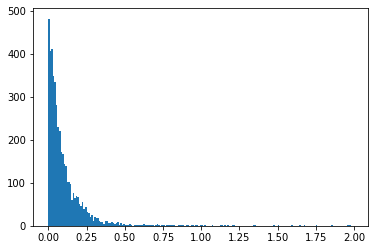

In [39]:
print(np.mean(pct_changes))
for i in range(len(pct_changes)):
    if pct_changes[i] > 1000:
        pct_changes[i] = 1000
print(np.mean(pct_changes))
print(max(pct_changes))
bins = range(0,200)
bins = [item / 100 for item in bins]
plt.hist(pct_changes, bins = bins)
plt.show()